<a href="https://colab.research.google.com/github/ashleighr01/MLA_AMR/blob/main/FinalProject_Classification_AMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Final Project--Classification**

*Ashleigh Rufus*

#*Import Specific Models*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [5]:
from sklearn import set_config
set_config(display='diagram')

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [8]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#*Acquire Data*

In [9]:
shoppingdf = pd.read_csv('/content/gdrive/MyDrive/CS430/online_shoppers_intention.csv')

In [10]:
shoppingdf.sample(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7046,0,0.000000,0,0.00,14,343.520000,0.000000,0.028571,0.000000,0.0,Jul,3,2,8,1,Returning_Visitor,True,False
10504,2,217.000000,0,0.00,34,409.500000,0.000000,0.005556,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12002,2,67.166667,0,0.00,61,2495.615079,0.005650,0.016001,0.000000,0.0,Dec,2,2,3,2,Returning_Visitor,True,False
1863,0,0.000000,0,0.00,3,51.500000,0.000000,0.066667,0.000000,0.0,Mar,3,2,1,10,Returning_Visitor,True,False
11544,0,0.000000,0,0.00,13,342.920238,0.000000,0.011795,0.000000,0.0,Nov,3,2,3,2,New_Visitor,True,False
8840,6,65.416667,0,0.00,29,1904.541667,0.004848,0.026061,0.000000,0.0,Nov,1,1,2,8,Returning_Visitor,False,True
3309,1,88.000000,0,0.00,11,522.666667,0.000000,0.022222,0.000000,0.0,May,3,3,1,4,Returning_Visitor,False,False
8328,5,60.500000,0,0.00,5,50.000000,0.000000,0.025000,0.000000,0.0,Dec,8,13,9,20,Other,True,True
10884,4,92.000000,0,0.00,21,755.000000,0.000000,0.004348,0.000000,0.0,Nov,3,2,1,2,New_Visitor,False,False
6139,1,197.400000,0,0.00,83,1631.400000,0.027381,0.068651,0.000000,0.0,Oct,2,2,3,13,Returning_Visitor,False,False


#*Statistical & Visual Exploration*

In [11]:
shoppingdf.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [12]:
revenue = shoppingdf.Revenue.groupby(shoppingdf.Revenue).count()
revenue

Revenue
False    10422
True      1908
Name: Revenue, dtype: int64

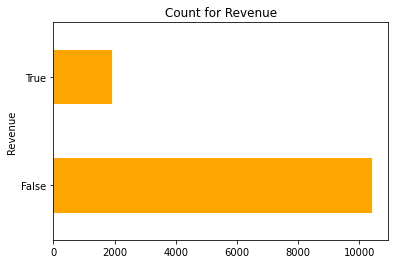

In [13]:
revenue.plot(kind='barh', title="Count for Revenue", color='Orange')

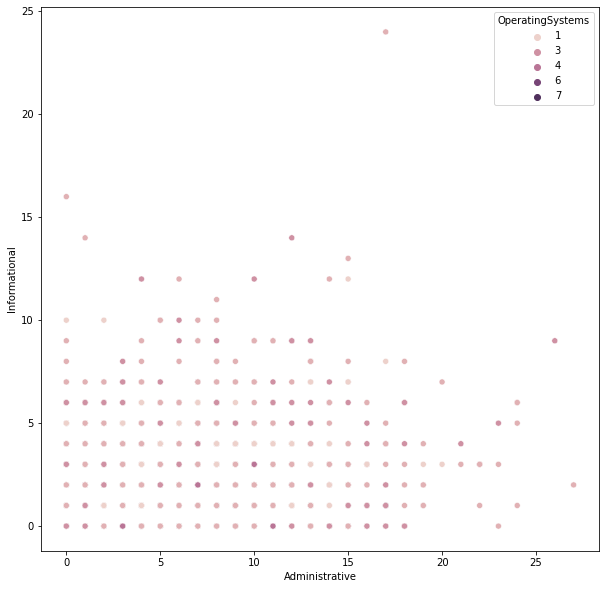

In [14]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x='Administrative',y='Informational', data=shoppingdf, hue='OperatingSystems')

#*Splitting the Data into Train/Test*

In [15]:
shoppingdf.Revenue = shoppingdf.Revenue.astype('int')

In [16]:
shoppingdf.Revenue.groupby(shoppingdf.Revenue).count()

Revenue
0    10422
1     1908
Name: Revenue, dtype: int64

In [17]:
shoppingdf.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1175,0,0.00,0,0.0,30,1224.750,0.000000,0.007143,21.048642,0.0,Mar,2,4,2,2,New_Visitor,False,1
3890,2,17.00,0,0.0,14,260.200,0.000000,0.037500,0.000000,0.4,May,2,2,3,3,Returning_Visitor,False,0
2163,1,0.00,0,0.0,7,88.000,0.062500,0.116667,0.000000,0.8,May,3,2,1,6,Returning_Visitor,False,0
9151,3,34.25,2,17.0,60,2335.125,0.001563,0.018750,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,True,0
3209,0,0.00,0,0.0,12,1111.000,0.000000,0.033333,0.000000,0.6,May,2,2,5,1,Returning_Visitor,False,0


In [18]:
X = shoppingdf.iloc[:, 0:-1]
y = shoppingdf[['Revenue']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=32)

#*Building the Pipeline(s)*

In [20]:
shoppingdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [21]:
num_attribs = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
cat_attribs = ['Month', 'VisitorType', 'Weekend']

In [22]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

*Logistic Regression*

In [23]:
logistic = Pipeline([
    ('transform', col_transform),
    ('logisticReg', LogisticRegression(max_iter=1000)),
])

*K-Nearest Neighbor*

In [24]:
knn = Pipeline([
    ('transform', col_transform),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
])

*GridSearchCV*

In [25]:
parameters = {
    'knn__n_neighbors':[3,6,8,11],
    'knn__weights':['uniform','distance'],
    'knn__leaf_size':[15,20]
}

In [26]:
grid_pipeline = GridSearchCV(knn, param_grid=parameters)

#*Execute the Models*

*Logistic Regression*

In [27]:
logistic.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Month', 'VisitorType',
                                                   'Weekend'])])),
                ('logisticReg', LogisticRegression(max_iter=1000))])

*K-Nearest Neighbor*

In [28]:
knn.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Month', 'VisitorType',
                                                   'Weekend'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

*GridSearchCV*

In [29]:
grid_pipeline.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'SpecialDay',
                                                                          'OperatingSystems',
                                                                          'Browser',
                                                                          'Region',
                                                                          'TrafficType']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Month',
                                                                          'VisitorType',
                                                                          'Weekend'])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__leaf_size': [15, 20],
                         'knn__n_neighbors': [3, 6, 8, 11],
                         'knn__weights': ['uniform', 'distance']})

#*Evaluate the Models*

*Logistic Regression*

In [30]:
y_pred_lr = logistic.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2064
           1       0.80      0.26      0.39       402

    accuracy                           0.87      2466
   macro avg       0.84      0.62      0.66      2466
weighted avg       0.86      0.87      0.84      2466



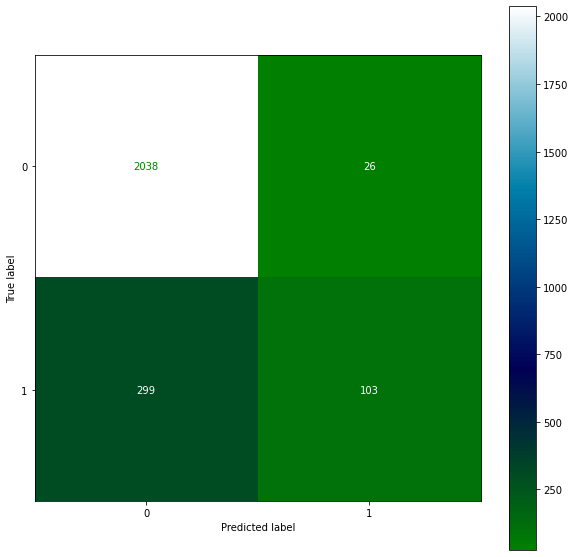

In [32]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='ocean')

In [41]:
y_pred_proba = logistic.predict_proba(X_test)[::,1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_proba)

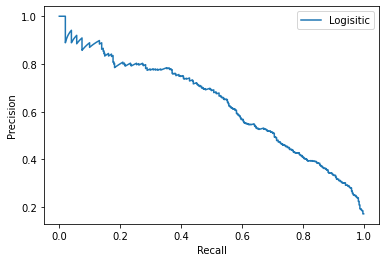

In [42]:
plt.plot(lr_recall, lr_precision, label="Logisitic")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

In [43]:
auc(lr_recall, lr_precision)

0.6330545341828994

*K-Nearest Neighbor*

In [33]:
y_pred_knn = knn.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2064
           1       0.52      0.25      0.34       402

    accuracy                           0.84      2466
   macro avg       0.69      0.60      0.63      2466
weighted avg       0.81      0.84      0.82      2466



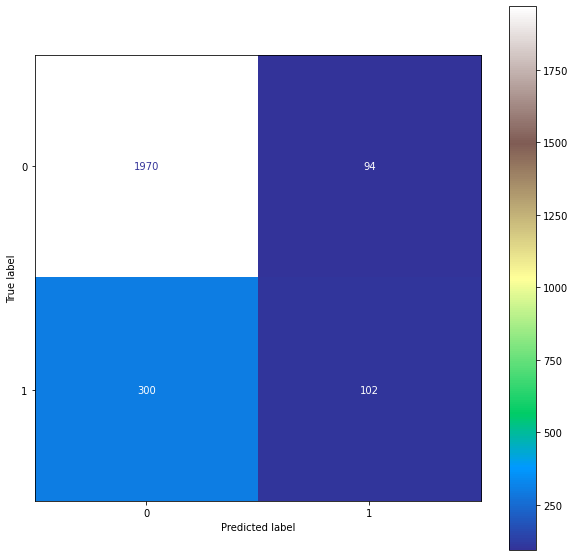

In [35]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='terrain')

In [45]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
knn_precision, knn_recall, _ = precision_recall_curve(y_test, y_pred_proba)

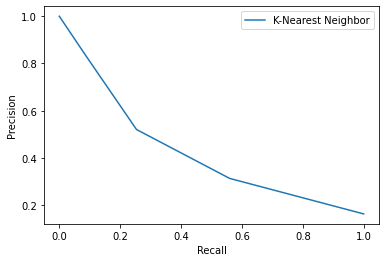

In [46]:
plt.plot(knn_recall, knn_precision, label="K-Nearest Neighbor")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

In [47]:
auc(knn_recall, knn_precision)

0.42505311900526077

*GridSearchCV*

In [36]:
grid_pipeline.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 8, 'knn__weights': 'distance'}

In [37]:
grid_pipeline.score(X_test, np.ravel(y_test))

0.8523925385239254

***Evaluation Results***

*Logistic Regression appears to be the better model for predicting if there was revenue made from the online shopper. However, when the Precision-Recall curve was applied, the score was not high at all. I had originally chosen the ROC curve but noticed that the scores appeared similarly high even though the confusion matrix showed low true positive rates for both classifiers. When I realized that the count for the revenue was very imbalanced the Precision-Recall curve became the better decision.*

#**Conclusion**

Both models do not seem all that feasible for accurately predicting the positive result for this data. That may be due to the imbalance in the results (over 80% of the outcomes resulted in false). The GridSearchCV score does appear strong using KNN.